In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = [8, 7]
import pandas as pd 
import datetime as dt
import time as tm
from datetime import date
import calendar
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

In [51]:
import math
import os
os.chdir('D:/Datasets/cv/Deep learning with TensorFlow')
os.getcwd()

'D:\\Datasets\\cv\\Deep learning with TensorFlow'

In [4]:
tf.__version__

'1.12.0'

In [5]:
a = tf.constant(1)
b = tf.constant(2)

In [6]:
c = a+b
d = a-b

# Tensors are multidimensional arrays (also called as tensors)

In [7]:
V1 = tf.constant([1,2])                  # Vector 1D
V2 = tf.constant([3,4])                  # Vector 1D
M = tf.constant([[1,2]])                 # Matrix 2D
N = tf.constant([[1,2],[3,4]])           # Matrix 2D
K = tf.constant([[[1,2], [3,4]]])        # Tensor 3D 

In [8]:
# Computations on Scalar
V3 = V1*V2  

In [9]:
# Computation operations are element-wise by default
M2 = M*M    

In [10]:
# True Matrix Multiplication requires a special call
NN = tf.matmul(N,N)

## The above code hasn't computed anything. It has only defined the TF graph.
#### To do any computations, a session must be created

In [11]:
sess = tf.Session()

## Now you can run specific nodes of your graph

In [12]:
output = sess.run(NN)
print("NN is : ")
print(output)
print(type(output))

NN is : 
[[ 7 10]
 [15 22]]
<class 'numpy.ndarray'>


## Close the session once the work is over

In [13]:
sess.close()

## To work interactively, create a interactive session

In [14]:
sess = tf.InteractiveSession()

In [15]:
print("M2 is : ")
print(M2.eval())
print(type(M2.eval()))

print('\nComputing M2 without .eval() \n')
print(M2)
print(type(M2))

M2 is : 
[[1 4]]
<class 'numpy.ndarray'>

Computing M2 without .eval() 

Tensor("mul_1:0", shape=(1, 2), dtype=int32)
<class 'tensorflow.python.framework.ops.Tensor'>


## To create a variable (if you need to modify a entity like weights of NN)

In [16]:
W = tf.Variable(0, name="weight")

## The only catch being that, variables must be initialized by TensorFlow before use

In [17]:
init_op = tf.initialize_all_variables()
sess.run(init_op)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [18]:
print("W is:")
print(W.eval())

W is:
0


In [19]:
W = W+a
print("W after adding a:")
print(W.eval())

W after adding a:
1


In [20]:
W += a
print("W after adding a again:")
print(W.eval())

W after adding a again:
2


## You can return or supply arbitrary nodes

In [21]:
E = d + b # 1*2 + 2 = 4

In [22]:
print("E as defined:")
print(E.eval())

E as defined:
1


In [23]:
print("E and d:")
print(sess.run([E,d]))

E and d:
[1, -1]


## Use a custom d by specifying a dictionary

In [24]:
print("E with custom d=4:")
print(sess.run(E, feed_dict = {d:4.}))

E with custom d=4:
6


# Logistic Regression Model in Tensorflow

In [25]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

In [26]:
np.random.seed(0)

In [27]:
data = np.load('All in One Code/data_with_labels.npz')
print(data.files)

['arr_0', 'arr_1']


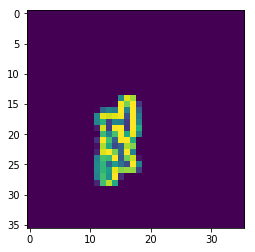

In [28]:
for i in data['arr_0']:
    plt.imshow(i)

In [29]:
data = np.load('All in One Code/data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']

In [30]:
plt.ion()

IndexError: index 3031 is out of bounds for axis 0 with size 2511

<Figure size 792x792 with 0 Axes>

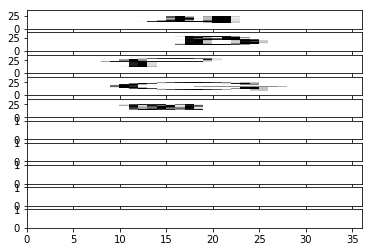

In [81]:
plt.figure(figsize=(6,6))
f, plts = plt.subplots(5, sharex=True)
c = 91
for i in range(5):
    plts[i].pcolor(train[c+i*588], cmap = plt.cm.gray_r)

```
    Convert labels to "one-hot" format.
    a = [0,1,2,3]
    to_onehot(a,5)
    array([[ 1.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.,  0.]])
```

In [32]:
def to_onehot(labels, nclasses=5):
    outlabels = np.zeros((len(labels), nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

In [33]:
onehot = to_onehot(labels)

### Split data into training and validation

In [34]:
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0] * 0.1)
test_idx, training_idx = indices[:valid_cnt], indices[valid_cnt:]
test, train = train[test_idx,:], train[training_idx,:]
onehot_test, onehot_train = onehot[test_idx,:], onehot[training_idx,:]

In [35]:
sess = tf.InteractiveSession()

C:\Users\akshay.v\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [36]:
x = tf.placeholder("float", [None, 1296])
y_ = tf.placeholder("float", [None, 5])

### Create Weights and Biases for the NN Model

In [37]:
W = tf.Variable(tf.zeros([1296,5]))
b = tf.Variable(tf.zeros([5]))

### Initialize all variables in the Computation graph

In [38]:
sess.run(tf.initialize_all_variables())

### Define the Model

In [39]:
y = tf.nn.softmax(tf.matmul(x,W)+b)

### Using the cross entropy loss function to minimize error for one hot encoded values

In [40]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y+1e-50, labels=y_))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [41]:
train_step = tf.train.GradientDescentOptimizer(0.02).minimize(cross_entropy)

### Defining Accuracy

In [42]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

### Actually train

In [43]:
epochs = 1000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs)):
    # Record summary data, and the accuracy
    if i % 10 == 0:
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={
            x: train.reshape([-1,1296]),
            y_: onehot_train})
        train_acc[i//10] = A
        # And now the validation set
        A = accuracy.eval(feed_dict={
            x: test.reshape([-1,1296]),
            y_: onehot_test})
        test_acc[i//10] = A
    train_step.run(feed_dict={
        x: train.reshape([-1,1296]),
        y_: onehot_train})

In [44]:
# Notice that accuracy flattens out
print(train_acc[-1])
print(test_acc[-1])

0.3847073018550873
0.35483869910240173


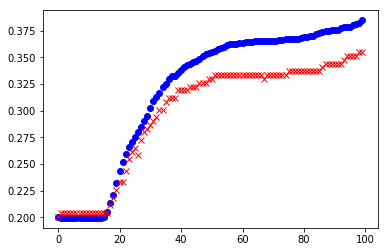

In [45]:
# Plot the accuracy curves
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

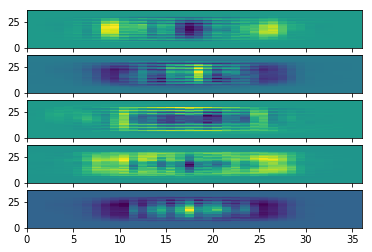

In [46]:
# Look at a subplot of the weights for each font
f, plts = plt.subplots(5, sharex=True)
for i in range(5):
    plts[i].pcolor(W.eval()[:,i].reshape([36,36]))

In [49]:
sess.close()

In [50]:
sess = tf.InteractiveSession()

In [52]:
x1 = tf.Variable(tf.truncated_normal([5], mean=3, stddev=1./math.sqrt(5)))
x2 = tf.Variable(tf.truncated_normal([5], mean=-1, stddev=1./math.sqrt(5)))
x3 = tf.Variable(tf.truncated_normal([5], mean=0, stddev=1./math.sqrt(5)))

In [53]:
sess.run(tf.initialize_all_variables())

### Activation functions - square root

In [58]:
sqx2 = x2*x2
print(x2.eval())
print(sqx2.eval())

[-1.354476   -0.5049241  -0.1171332  -0.49643666 -0.83171856]
[1.8346052  0.25494838 0.01372019 0.24644935 0.6917558 ]


### Activation functions - logarithmic transformation

In [56]:
logx1 = tf.log(x1)
print(x1.eval())
print(logx1.eval())

[3.263153  3.2638419 2.3457975 3.0374742 2.7036185]
[1.182694   1.182905   0.8526254  1.1110263  0.99459106]


### Activation functions - logistic/signum function

In [57]:
sigx3 = tf.sigmoid(x3)
print(x3.eval())
print(sigx3.eval())

[ 0.46079397 -0.82999617  0.59342515  0.05130196  0.12885715]
[0.6132025  0.30364588 0.6441507  0.5128227  0.53216976]


### Linearly combining multiple inputs, then transform

In [60]:
w1 = tf.constant(0.1)
w2 = tf.constant(0.2)
sess.run(tf.initialize_all_variables())
n1 = tf.sigmoid(w1*x1 + w2*x2)
print((w1*x1).eval())
print((w2*x2).eval())
print(n1.eval())

[0.37690753 0.3095802  0.2755351  0.32741436 0.35225254]
[-0.17235117 -0.2888265  -0.19080608 -0.31764087 -0.19667362]
[0.5509615  0.5051882  0.5211696  0.5024433  0.53881645]


## Implementing the Logistic Regression algo. with basic Neural Network in TensorFlow

In [7]:
import tensorflow as tf
import numpy as np
import math
from tqdm import tqdm

data = np.load('D:/Datasets/cv/Deep learning with TensorFlow/All in One Code/data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']

print(train[0])
print(labels[0])

import matplotlib.pyplot as plt
plt.ion()

def to_onehot(labels,nclasses = 5):
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

onehot = to_onehot(labels)

# Train-Test split
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0] * 0.1)
test_idx, training_idx = indices[:valid_cnt], indices[valid_cnt:]
test, train = train[test_idx,:], train[training_idx,:]
onehot_test, onehot_train = onehot[test_idx,:], onehot[training_idx,:]

sess = tf.InteractiveSession()


# These will be inputs
## Input pixels, flattened
x = tf.placeholder("float", [None, 1296])
## Known labels
y_ = tf.placeholder("float", [None,5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0


### Hidden Layer --> Number of Neurons you want 

In [64]:
num_hidden = 128
W1 = tf.Variable(tf.truncated_normal([1296, num_hidden], stddev=1./math.sqrt(1296)))
b1 = tf.Variable(tf.constant(0.1, shape=[num_hidden]))
h1 = tf.sigmoid(tf.matmul(x,W1)+b1)

### Output Layer

In [65]:
W2 = tf.Variable(tf.truncated_normal([num_hidden, 5], stddev=1./math.sqrt(5)))
b2 = tf.Variable(tf.constant(0.1,shape=[5]))

In [66]:
sess.run(tf.initialize_all_variables())

### Define the Basic Neural Network Model ----- With only one hidden layer of Neuron 

In [67]:
y = tf.nn.softmax(tf.matmul(h1, W2)+b2)

100%|##########| 10000/10000 [16:54<00:00,  8.64it/s]


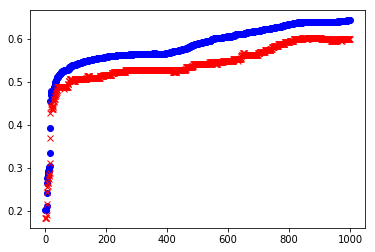

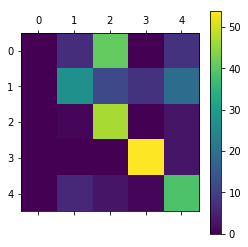

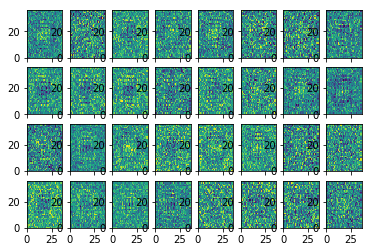

In [70]:
cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=y + 1e-20, labels=y_))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

epochs = 10000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs), ascii=True):
    if i % 10 == 0:         
        A = accuracy.eval(feed_dict={x: train.reshape([-1,1296]), y_: onehot_train})
        train_acc[i//10] = A

        A = accuracy.eval(feed_dict={x: test.reshape([-1,1296]), y_: onehot_test})
        test_acc[i//10] = A
    train_step.run(feed_dict={x: train.reshape([-1,1296]), y_: onehot_train})

plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

pred = np.argmax(y.eval(feed_dict={x: test.reshape([-1,1296]), y_: onehot_test}), axis = 1)
conf = np.zeros([5,5])
for p,t in zip(pred,np.argmax(onehot_test,axis=1)):
    conf[t,p] += 1

plt.matshow(conf)
plt.colorbar()

f, plts = plt.subplots(4,8, sharex=True)
for i in range(32):
    plts[i//8, i%8].pcolormesh(W1.eval()[:,i].reshape([36,36]))

## Multiple Hidden Layer Model 

In [71]:
import tensorflow as tf
import numpy as np
import math
from tqdm import tqdm
%autoindent

data = np.load('data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']

print(train[0])
print(labels[0])

import matplotlib.pyplot as plt
plt.ion()

def to_onehot(labels,nclasses = 5):
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

onehot = to_onehot(labels)

# Train-Test split
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0] * 0.1)
test_idx, training_idx = indices[:valid_cnt], indices[valid_cnt:]
test, train = train[test_idx,:], train[training_idx,:]
onehot_test, onehot_train = onehot[test_idx,:], onehot[training_idx,:]

sess = tf.InteractiveSession()


# These will be inputs
## Input pixels, flattened
x = tf.placeholder("float", [None, 1296])
## Known labels
y_ = tf.placeholder("float", [None,5])

UsageError: Line magic function `%autoindent` not found.


### Hidden Layer 1

In [72]:
num_hidden1 = 128
W1 = tf.Variable(tf.truncated_normal([1296, num_hidden1], stddev=1./math.sqrt(1296)))
b1 = tf.Variable(tf.constant(0.1, shape=[num_hidden1]))
h1 = tf.sigmoid(tf.matmul(x,W1)+b1)

### Hidden Layer 2

In [73]:
num_hidden2 = 32
W2 = tf.Variable(tf.truncated_normal([num_hidden1, num_hidden2], stddev=2./math.sqrt(num_hidden1)))
b2 = tf.Variable(tf.constant(0.1,shape=[num_hidden2]))
h2 = tf.sigmoid(tf.matmul(h1,W2)+b2)

### Output Layer

In [74]:
W3 = tf.Variable(tf.truncated_normal([num_hidden2, 5], stddev=1./math.sqrt(5)))
b3 = tf.Variable(tf.constant(0.1,shape=[5]))

In [75]:
sess.run(tf.initialize_all_variables())

### Defining the Deep Neural Network Model

In [76]:
y = tf.nn.softmax(tf.matmul(h2,W3)+b3)

100%|##########| 25000/25000 [42:51<00:00, 10.20it/s] 


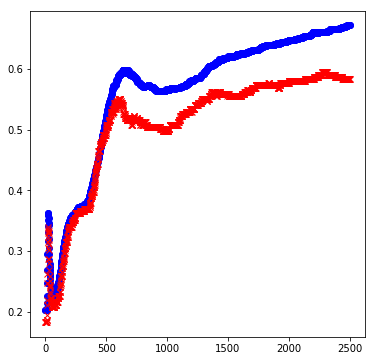

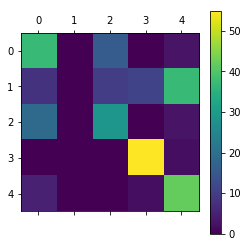

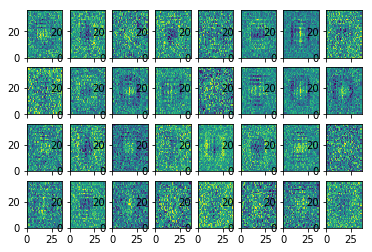

In [78]:
cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=y + 1e-20, labels=y_))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

epochs = 25000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs), ascii=True):
    if i % 10 == 0:         
        A = accuracy.eval(feed_dict={x: train.reshape([-1,1296]), y_: onehot_train})
        train_acc[i//10] = A

        A = accuracy.eval(feed_dict={x: test.reshape([-1,1296]), y_: onehot_test})
        test_acc[i//10] = A
    train_step.run(feed_dict={x: train.reshape([-1,1296]), y_: onehot_train})

plt.figure(figsize=(6,6))
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

pred = np.argmax(y.eval(feed_dict={x: test.reshape([-1,1296]), y_: onehot_test}), axis = 1)
conf = np.zeros([5,5])
for p,t in zip(pred,np.argmax(onehot_test,axis=1)):
    conf[t,p] += 1

plt.matshow(conf)
plt.colorbar()

f, plts = plt.subplots(4,8, sharex=True)
for i in range(32):
    plts[i//8, i%8].pcolormesh(W1.eval()[:,i].reshape([36,36]))

ValueError: Parent directory of mpl.ckpt doesn't exist, can't save.

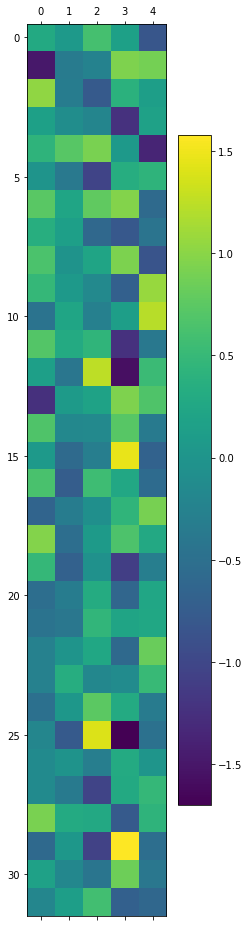

In [79]:
# Examine the output weights
plt.matshow(W3.eval())
plt.colorbar()

# Save the weights
saver = tf.train.Saver()
saver.save(sess, "mpl.ckpt")

# Restore
saver.restore(sess, "mlp.ckpt")

# Convolutional Neural Networks

In [1]:
import tensorflow as tf
import math
import numpy as np

sess = tf.InteractiveSession()

image = np.random.randint(10,size=[1,10,10]) + np.eye(10)*10

x = tf.placeholder("float", [None, 10, 10])
x_im = tf.reshape(x, [-1,10,10,1])
winx = 3
winy = 3
num_filters = 2

W1 = tf.Variable(tf.truncated_normal(
    [winx, winy,1, num_filters],
    stddev=1./math.sqrt(winx*winy)))
b1 = tf.Variable(tf.constant(
    0.1,shape=[num_filters]))

xw = tf.nn.conv2d(x_im, W1,
        strides=[1, 1, 1, 1],
        padding='SAME')
h1 = tf.nn.relu(xw + b1)

sess.run(tf.initialize_all_variables())

H = h1.eval(feed_dict = {x: image})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [2]:
import matplotlib.pyplot as plt
plt.ion()

# Original
plt.matshow(image[0])
plt.colorbar()

# Conv channel 1
plt.matshow(H[0,:,:,0])
plt.colorbar()

# Conv channel 2
plt.matshow(H[0,:,:,1])
plt.colorbar()

# Pooling Layer
#### "Max" pooling keeps best of 2x2 square in h1 output
#### ksize defines size of this block
#### "VALID" padding means incomplete squares are not used
#### Stride of 2x2 means no overlap of 2x2 blocks

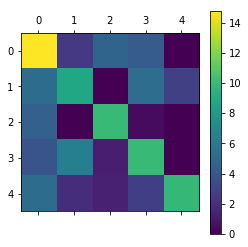

In [3]:

p1 = tf.nn.max_pool(h1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# We automatically determine the size
p1_size = np.product([s.value for s in p1.get_shape()[1:]])

# Need to flatten convolutional output for use in a dense layer
# -1 chooses appropriate shape to keep overall size the same
p1f = tf.reshape(p1, [-1, p1_size ])

# Pooling Layer before flattening
# Note how it's only 5x5, because we took the best of every 2x2 window
P = p1.eval(feed_dict = {x: image})
plt.matshow(P[0,:,:,0])
plt.colorbar()

## Building a CNN from scratch in Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import math
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

np.random.seed(0)

# Load data
data = np.load('D:/Datasets/cv/Deep learning with TensorFlow/All in One Code/data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']

# Look at some data
print(train[0])
print(labels[0])

# If you have matplotlib installed
import matplotlib.pyplot as plt
plt.ion()

def to_onehot(labels,nclasses = 5):
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

onehot = to_onehot(labels)

# Split data into training and validation
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0] * 0.1)
test_idx, training_idx = indices[:valid_cnt], indices[valid_cnt:]
test, train = train[test_idx,:],train[training_idx,:]
onehot_test, onehot_train = onehot[test_idx,:],onehot[training_idx,:]

sess = tf.InteractiveSession()


# These will be inputs
## Input pixels, image with one channel (gray)
x = tf.placeholder("float", [None, 36, 36])
# Note that -1 is for reshaping
x_im = tf.reshape(x, [-1,36,36,1])
## Known labels
# None works during variable creation to be unspecified size
y_ = tf.placeholder("float", [None,5])

# Conv layer 1
num_filters = 4
winx = 5
winy = 5

W1 = tf.Variable(tf.truncated_normal([winx, winy, 1 , num_filters],stddev=1./math.sqrt(winx*winy)))
b1 = tf.Variable(tf.constant(0.1,shape=[num_filters]))

# 5x5 convolution, pad with zeros on edges
xw = tf.nn.conv2d(x_im, W1,strides=[1, 1, 1, 1],padding='SAME')
h1 = tf.nn.relu(xw + b1)

# 2x2 Max pooling, no padding on edges
p1 = tf.nn.max_pool(h1, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='VALID')

# Need to flatten convolutional output for use in dense layer
p1_size = np.product([s.value for s in p1.get_shape()[1:]])
p1f = tf.reshape(p1, [-1, p1_size ])

# Dense layer
num_hidden = 32
W2 = tf.Variable(tf.truncated_normal([p1_size, num_hidden],stddev=2./math.sqrt(p1_size)))
b2 = tf.Variable(tf.constant(0.2,shape=[num_hidden]))
h2 = tf.nn.relu(tf.matmul(p1f,W2) + b2)

# Output Layer
W3 = tf.Variable(tf.truncated_normal([num_hidden, 5],stddev=1./math.sqrt(num_hidden)))
b3 = tf.Variable(tf.constant(0.1,shape=[5]))

keep_prob = tf.placeholder("float")
h2_drop = tf.nn.dropout(h2, keep_prob)

# Just initialize
sess.run(tf.initialize_all_variables())

# Define model
y = tf.nn.softmax(tf.matmul(h2_drop,W3) + b3)

### End model specification, begin training code


# Climb on cross-entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= y + 1e-50, labels= y_))

# How we train
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Actually train
epochs = 5000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs), ascii=True):
    # Record summary data, and the accuracy
    if i % 10 == 0:  
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={x: train,
            y_: onehot_train, keep_prob: 1.0})
        train_acc[i//10] = A
        # And now the validation set
        A = accuracy.eval(feed_dict={x: test,
            y_: onehot_test, keep_prob: 1.0})
        test_acc[i//10] = A
    train_step.run(feed_dict={x: train,
        y_: onehot_train, keep_prob: 0.5})

# Plot the accuracy curves
plt.figure(figsize=(6, 6))
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

# Look at the final testing confusion matrix
pred = np.argmax(y.eval(feed_dict={x: test, keep_prob: 1.0,y_: onehot_test}), axis = 1)
conf = np.zeros([5,5])
for p,t in zip(pred,np.argmax(onehot_test,axis=1)):
    conf[t,p] += 1

plt.matshow(conf)
plt.colorbar()

# Let's look at a subplot of some weights
f, plts = plt.subplots(4)
for i in range(4):
    plts[i].matshow(W1.eval()[:,:,0,i])

# Examine the output weights
plt.matshow(W3.eval())
plt.colorbar()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



100%|##########| 5000/5000 [2:43:04<00:00,  1.65s/it]  


ValueError: Parent directory of conv1.ckpt doesn't exist, can't save.

TypeError: Cannot interpret feed_dict key as Tensor: Can not convert a int into a Tensor.

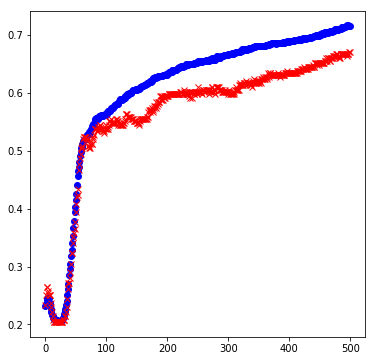

In [8]:
# Plot the accuracy curves
plt.figure(figsize=(6, 6))
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

# Look at the final testing confusion matrix
pred = np.argmax(y.eval(feed_dict={x: test, keep_prob: 1.0,y_: onehot_test}), axis = 1)
conf = np.zeros([5,5])
for p,t in zip(pred,np.argmax(onehot_test,axis=1)):
    conf[t,p] += 1

plt.matshow(conf)
plt.colorbar()

# Let's look at a subplot of some weights
f, plts = plt.subplots(4)
for i in range(4):
    plts[i].matshow(W1.eval()[:,:,0,i])

# Examine the output weights
plt.matshow(W3.eval())
plt.colorbar()

In [2]:
# Or use Numpy manually
def save_all(name = 'conv1'):
    np.savez_compressed(name, W1.eval(),b1.eval(), W2.eval(), b2.eval(),W3.eval(), b3.eval())

save_all()

def load_all(name = 'conv1.npz'):
    data = np.load(name)
    sess.run(W1.assign(data['arr_0']))
    sess.run(b1.assign(data['arr_1']))
    sess.run(W2.assign(data['arr_2']))
    sess.run(b2.assign(data['arr_3']))
    sess.run(W3.assign(data['arr_4']))
    sess.run(b3.assign(data['arr_5']))

load_all()

In [14]:
data = np.load('C:/Users/akshay.v/My Computer Vision/conv1.npz')
np.set_printoptions(threshold=np.inf)
# train = data['arr_0']/255.
# labels = data['arr_1']
lst = data.files
for item in lst:
    print(item)
    print(data[item])

arr_0
[[[[-0.21022788 -0.15741205 -0.06413814  0.38165197]]

  [[-0.24159515 -0.07274475 -0.08032327  0.35944787]]

  [[-0.23012543 -0.3226084  -0.11246204  0.43410173]]

  [[ 0.21346125  0.07289382 -0.26257038  0.3632859 ]]

  [[ 0.03837192 -0.00912895 -0.0868139   0.13521467]]]


 [[[-0.1451364  -0.06068986  0.35699925  0.30752158]]

  [[-0.18052119  0.24229744  0.10920341  0.29447013]]

  [[ 0.09129977 -0.21997218 -0.05844792  0.391784  ]]

  [[ 0.26131135  0.4241845  -0.20823832  0.39883742]]

  [[ 0.17793646  0.18127424  0.15874474  0.15171929]]]


 [[[ 0.16296731 -0.03524819 -0.07331932  0.37924984]]

  [[-0.33084762  0.2155376  -0.02990572  0.10895796]]

  [[-0.3410316  -0.20030981  0.18313229  0.2147388 ]]

  [[-0.06189267  0.14521115  0.1387559   0.31071752]]

  [[ 0.4337531  -0.2541942  -0.11626854  0.18423346]]]


 [[[-0.24213755 -0.09514344  0.20242503  0.5047558 ]]

  [[-0.05685382  0.07114083 -0.480832    0.2387821 ]]

  [[ 0.32801488 -0.14332585 -0.07405703  0.38675365]]

  -7.00286329e-02 -3.97947021e-02  2.26172823e-02 -9.84992608e-02]]
arr_3
[0.19188182 0.21319103 0.15942918 0.18675372 0.20824613 0.19589621
 0.20632046 0.21225968 0.21902916 0.20696232 0.2201509  0.20377353
 0.18208975 0.1540477  0.22037557 0.21763767 0.19892932 0.19641125
 0.20359582 0.1612729  0.22090188 0.2013404  0.16653779 0.20344618
 0.22316255 0.19879338 0.19321609 0.2138323  0.18061832 0.19929361
 0.20499928 0.18101218]
arr_4
[[-0.2515078   0.24071042  0.00173284  0.1215191   0.27470028]
 [-0.41201997  0.26060405 -0.15682785 -0.21241301  0.05325983]
 [-0.18398279 -0.01086093 -0.12263353  0.3154373  -0.2569759 ]
 [-0.06500338  0.02314779 -0.3302928   0.27815935  0.34535995]
 [-0.01289288 -0.00626403  0.29963624  0.09625098 -0.29786846]
 [-0.05579373  0.01327268  0.34067792  0.06616463  0.13486806]
 [-0.44798437  0.17440663  0.4024762  -0.20325914 -0.1769224 ]
 [ 0.39522484 -0.3321341   0.31702694 -0.09375039 -0.24698678]
 [ 0.01125532  0.25271812 -0.08928401 -0.18114543  0.4344

In [26]:
for i in range(6):
    i
    print('W'+str(i), data[data.files[i]].shape)
    
for i in range(6):
    print('b'+str(i), data[data.files[i]].shape)

W0 (5, 5, 1, 4)
b1 (4,)


In [25]:
data['arr_0']

array([[[[-0.21022788, -0.15741205, -0.06413814,  0.38165197]],

        [[-0.24159515, -0.07274475, -0.08032327,  0.35944787]],

        [[-0.23012543, -0.3226084 , -0.11246204,  0.43410173]],

        [[ 0.21346125,  0.07289382, -0.26257038,  0.3632859 ]],

        [[ 0.03837192, -0.00912895, -0.0868139 ,  0.13521467]]],


       [[[-0.1451364 , -0.06068986,  0.35699925,  0.30752158]],

        [[-0.18052119,  0.24229744,  0.10920341,  0.29447013]],

        [[ 0.09129977, -0.21997218, -0.05844792,  0.391784  ]],

        [[ 0.26131135,  0.4241845 , -0.20823832,  0.39883742]],

        [[ 0.17793646,  0.18127424,  0.15874474,  0.15171929]]],


       [[[ 0.16296731, -0.03524819, -0.07331932,  0.37924984]],

        [[-0.33084762,  0.2155376 , -0.02990572,  0.10895796]],

        [[-0.3410316 , -0.20030981,  0.18313229,  0.2147388 ]],

        [[-0.06189267,  0.14521115,  0.1387559 ,  0.31071752]],

        [[ 0.4337531 , -0.2541942 , -0.11626854,  0.18423346]]],


       [[[-0.242137

In [ ]:
import tensorflow as tf
import numpy as np
import math
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

np.random.seed(0)

# Load data
data = np.load('D:/Datasets/cv/Deep learning with TensorFlow/All in One Code/data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']

# Look at some data
print(train[0])
print(labels[0])

# If you have matplotlib installed
import matplotlib.pyplot as plt
plt.ion()

def to_onehot(labels,nclasses = 5):
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

onehot = to_onehot(labels)

# Split data into training and validation
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0] * 0.1)
test_idx, training_idx = indices[:valid_cnt], indices[valid_cnt:]
test, train = train[test_idx,:],train[training_idx,:]
onehot_test, onehot_train = onehot[test_idx,:],onehot[training_idx,:]

sess = tf.InteractiveSession()


# These will be inputs
## Input pixels, image with one channel (gray)
x = tf.placeholder("float", [None, 36, 36])
# Note that -1 is for reshaping
x_im = tf.reshape(x, [-1,36,36,1])
## Known labels
# None works during variable creation to be unspecified size
y_ = tf.placeholder("float", [None,5])

# Conv layer 1
num_filters1 = 16
winx1 = 3
winy1 = 3

W1 = tf.Variable(tf.truncated_normal([winx1, winy1, 1 , num_filters1],stddev=1./math.sqrt(winx1*winy1)))
b1 = tf.Variable(tf.constant(0.1,shape=[num_filters1]))

# 5x5 convolution, pad with zeros on edges
xw = tf.nn.conv2d(x_im, W1,strides=[1, 1, 1, 1],padding='SAME')
h1 = tf.nn.relu(xw + b1)

# 2x2 Max pooling, no padding on edges
p1 = tf.nn.max_pool(h1, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='VALID')

#Conv layer 2 
num_filter2 = 4
winx2 = 3
winy2 = 3

W2 = tf.Variable(tf.truncated_normal([winx1, winy1,1, num_filters2], stddev=1./math.sqrt(winx2*winy2)))
b2 = tf.Variable(tf.constant(0.1, shape=[num_filters2]))

## 5x5 convolution, pad with zeros on edges
p1w2 = tf.nn.conv2d(p1,W2,strides=[1,1,1,1],padding='SAME')
h2 = tf.nn.relu(p1w2 + b2)

p2 = tf.nn.max_pool(h2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

# Need to flatten convolutional output for use in dense layer
p2_size = np.product([s.value for s in p2.get_shape()[1:]])
p2f = tf.reshape(p2, [-1, p2_size ])

# Dense layer
num_hidden = 32
W3 = tf.Variable(tf.truncated_normal([p2_size, num_hidden],stddev=2./math.sqrt(p1_size)))
b3 = tf.Variable(tf.constant(0.2,shape=[num_hidden]))
h3 = tf.nn.relu(tf.matmul(p2f,W3) + b3)

keep_prob = tf.placeholder("float")
h3_drop = tf.nn.dropout(h3, keep_prob)

# Output Layer
W4 = tf.Variable(tf.truncated_normal([num_hidden, 5],stddev=1./math.sqrt(num_hidden)))
b4 = tf.Variable(tf.constant(0.1,shape=[5]))

# Just initialize
sess.run(tf.initialize_all_variables())

# Define model
y = tf.nn.softmax(tf.matmul(h2_drop,W3) + b3)

### End model specification, begin training code


# Climb on cross-entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= y + 1e-50, labels= y_))

# How we train
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Actually train
epochs = 5000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs), ascii=True):
    # Record summary data, and the accuracy
    if i % 10 == 0:  
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={x: train,
            y_: onehot_train, keep_prob: 1.0})
        train_acc[i//10] = A
        # And now the validation set
        A = accuracy.eval(feed_dict={x: test,
            y_: onehot_test, keep_prob: 1.0})
        test_acc[i//10] = A
    train_step.run(feed_dict={x: train,
        y_: onehot_train, keep_prob: 0.5})

# Plot the accuracy curves
plt.figure(figsize=(6, 6))
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

# Look at the final testing confusion matrix
pred = np.argmax(y.eval(feed_dict={x: test, keep_prob: 1.0,y_: onehot_test}), axis = 1)
conf = np.zeros([5,5])
for p,t in zip(pred,np.argmax(onehot_test,axis=1)):
    conf[t,p] += 1

plt.matshow(conf)
plt.colorbar()

# Let's look at a subplot of some weights
f, plts = plt.subplots(4)
for i in range(4):
    plts[i].matshow(W1.eval()[:,:,0,i])

# Examine the output weights
plt.matshow(W3.eval())
plt.colorbar()

# Or use Numpy manually
def save_all(name = 'conv1'):
    np.savez_compressed(name, W1.eval(),b1.eval(), W2.eval(), b2.eval(),W3.eval(), b3.eval())

save_all()

def load_all(name = 'conv1.npz'):
    data = np.load(name)
    sess.run(W1.assign(data['arr_0']))
    sess.run(b1.assign(data['arr_1']))
    sess.run(W2.assign(data['arr_2']))
    sess.run(b2.assign(data['arr_3']))
    sess.run(W3.assign(data['arr_4']))
    sess.run(b3.assign(data['arr_5']))

load_all()

# Recurrent Neural Networks